**Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Let A and B be (n, k) and (k, m) matrices respectively. Let C be the (n, m) matrix we obtain after multiplying A and B.

- If we intialize C as zero at first.
- Then Any element $a_{ij}$ is going to be multiplied all the m elements of $b_{jk}$ where $k \in [1, m]$ and each of them then added to m positions in C.
- That implies $2m$ operations for each element in A. Thus, for $nk$ elements, there would be $2nkm$ operations.
- But do note that at first when we only had zeroes in C, we do not actually need to perform the add operation. So, we can do it $nm$ less operations.

Thus final answer is, $2nm(k-1)$.

**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

<!-- I couldn't find a way to implement the multiplication in $2nm(k-1)$ operations exactly. But I managed to do it in $2nmk$ operations. -->

In [ ]:
import numpy as np
from time import time_ns

def multiply(a: list[list[int]], b: list[list[int]]) -> list[list[int]]:

    n = len(a)
    k = len(a[0])
    m = len(b[0])

    if len(b)!=k:
        raise Exception("Dimensions don't match for matrices A and B.")

    c = [[0]*m for _ in range(n)]

    for i in range(n):
        for j in range(k):
            for l in range(m):
                c[i][l] += a[i][j]*b[j][l]

    return c

n = 53
m = 37
k = 29

A = [[99]*k for _ in range(n)]
B = [[99]*m for _ in range(k)]
npA = np.array(A)
npB = np.array(B)

start = time_ns()
C = multiply(A, B)
end = time_ns()

print("Lists took ", f"{(end-start)/1e6:.2f}", " milliseconds")

start = time_ns()
npC = np.dot(npA, npB)
end = time_ns()

print("Numpy arrays took ", f"{(end-start)/1e6:.2f}", " milliseconds")

Lists took  16.76  milliseconds
Numpy arrays took  1.78  milliseconds


Running the above code, shows that lists in python take 17.76 milliseconds. Whereas, numpy takes 1.3 milliseconds.

Numpy is faster because:
- Numpy functions are implemented in C.
- Numpy arrays are a collection of similar data-types that are densely packed in memory. Python lists on the other hand can have different data types that puts constraints on the computation.

**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Let's consider an array A of n elements.

The suggested method requires $\frac{n}{2}$ linear passes over the array. Thus, the complextiy would be $O\bigg(\dfrac{n^2}{2}\bigg)$.

A better method will be to simply sort the array in $O\big(n\log n\big)$, and return the element in the middle.

An even better method will be to use the median of medians algorithm. Time complexity $O(n)$.

In [ ]:
import numpy as np
from time import time_ns
from random import randint

def popMax(arr: list[int]) -> int:
    maxEl = max(arr)
    arr.remove(maxEl)
    return maxEl

def nthLargest(arr: list[int]) -> int:
    n = len(arr)
    for _ in range(n//2):
        popMax(arr)
    return popMax(arr)

def medianOfMedians(arr: list[int]) -> int:
    # this provides a pivot for quickselect

    n = len(arr)

    if n<=5:
        return sorted(arr)[n//2]

    medians = []
    subs = [arr[i:i+5] for i in range(0, n, 5)]
    for group in subs:
        medians.append(sorted(group)[len(group)//2])

    return medianOfMedians(medians)

def quick_select(arr: list[int], idx: int) -> int:
    # idx is what the idx of element would be in a sorted array

    n = len(arr)

    if idx > n:
        return -1

    pivot = medianOfMedians(arr)
    left = [x for x in arr if x<pivot]
    mid = [x for x in arr if x==pivot]
    right = [x for x in arr if x>pivot]
    ans = pivot
    l, m = len(left), len(mid)

    if idx < l: ans = quick_select(left, idx)
    elif idx >= l + m: ans = quick_select(right, idx - (l + m))

    return ans


n = 9999
lis = [randint(0, 999) for _ in range(n)]
narr = np.array(lis)

start = time_ns()
ans = quick_select(lis, n//2)
end = time_ns()

print("Time for QuickSelect algorithm is ", f"{(end-start)/1e6:.2f}", " milliseconds and answer is ", ans)

start = time_ns()
ans = np.median(narr)
end = time_ns()

print("Time for numpy.median is ", f"{(end-start)/1e6:.2f}", " milliseconds and answer is ", ans)

start = time_ns()
ans = sorted(lis)[n//2]
end = time_ns()

print("Time by sorting is ", f"{(end-start)/1e6:.2f}", " milliseconds and answer is ", ans)


start = time_ns()
ans = nthLargest(lis)
end = time_ns()

print("Time for nth larget method  is ", f"{(end-start)/1e6:.2f}", " milliseconds and answer is ", ans)

Time for Median Of Medians algorithm is  25943.89  milliseconds and answer is  499
Time for numpy.median is  153.86  milliseconds and answer is  499.0
Time by sorting is  2792.67  milliseconds and answer is  499


Running the above code multiple time with n=9999 gave me following results.

| QuickSelect | numpy.median | sorting | nth largest |
| ----------- | ------------ | ------- | ----------- |
| 7.3         |   3.1        |  2.02   |  875        |
| 6.48        | 1.30         | 1.91    | 878         |
| 6.75        | 0.6          | 1.98    | 882.34      |
| 6.93        | 1.68         | 1.92    | 899.42      |
| 7.40        | 3.29         | 2.04    | 507         |
PS: Time is in milliseconds.

Observations:
- Finding nth largest element by doing multiple passes to pop out the max took the most time as expected.
- Quickselect was slower than numpy.median, which was also to be expected considering that numpy functions are implemented in C.
- Time taken by sorting was comparable to that of numpy.median and much quicker than quickselect. This is despite the fact that numpy.median is a linear time algorith whereas sorted is $n\log n$ time complexity.

This prompted me to run my code with n=9999999 (1 less than 100 million).

Here, numpy.median emerges as fastest, and the quickselect algorithm emerges as slowest.
- numpy.median: 153.86 ms
- sorted: 2792.67 ms
- QuickSelect: 25943.89 ms

Here, I think that sorted is faster than quickSelect because it's implementation is optimized in C. Quickselect would also develop a large call stack because of recursions during runtime.

**Q4. What is the gradient of the following function with respect to x and y?**
\begin{align}
f &= x^2y + y^3\sin{x} \\
\nabla f &= \frac {\delta f}{\delta x} \hat{i} + \frac {\delta f}{\delta y} \hat{j} \\
&= (2xy + y^3 \cos{x}) \hat{i} + (x^2 + 3y^2 \sin{x}) \hat{j}
\end{align}

Thus, the gradient of f with respect to x and y is $2xy + y^3 \cos{x}$ and $x^2 + 3y^2\sin{x}$ respectively.



**Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
from jax.numpy import sin, cos
from jax import grad
from random import random

def f(x: float, y: float) -> float:
    return (x ** 2) * y + (y ** 3) * sin(x)

def gfx(x: float, y:float) -> float:
    return 2 * x * y + (y ** 3) * cos(x)

def gfy(x: float, y: float) -> float:
    return (x ** 2) + 3 * (y ** 2) * sin(x)

gradf = grad(f, argnums=(0, 1))

for _ in range(9):
    x = random()
    y = random()
    ans1 = gradf(x, y)
    anx = gfx(x, y)
    any = gfy(x, y)
    print(ans1[0], ans1[1], anx, any)

0.65314084 0.27080232 0.6531409 0.27080232
0.6082217 0.5551516 0.6082217 0.5551515
0.32860613 0.8535368 0.32860613 0.8535367
0.032389443 0.008126501 0.032389443 0.008126501
0.00910588 0.00842598 0.00910588 0.00842598
1.0527102 1.2984521 1.0527102 1.2984521
0.58830106 0.2091474 0.5883011 0.20914741
0.045644797 0.057302363 0.0456448 0.057302367
1.5327125 2.049271 1.5327123 2.0492709


**Q6. Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
from sympy import symbols, diff, sin, cos

x, y = symbols('x y')
f = x**2 * y + y**3 * sin(x)
gradf = [diff(f, x), diff(f, y)]
print(gradf)

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


**Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [ ]:
dict = {
    2022:
      {
          "Branch 1":
          [
              {
                  "Roll Number": 1,
                  "Name": "N",
                  "Marks": {
                      "Maths": 100,
                      "English": 70,
                  }
              }
          ],
          "Branch 2": []
      },
    2023:
      {
          "Branch 1": [],
          "Branch 2": []
      },
    2024:
      {
          "Branch 1": [],
          "Branch 2": []
      },
    2025:
      {
          "Branch 1": [],
          "Branch 2": []
      }
}

# To add records to the above dictionary, we will need to append a
# dict record to the list that the student's branch points to

**Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks
    def addMarks(self, subject, marks):
        self.marks[subject] = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    def addStudent(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def addBranch(self, branch):
        self.branches.append(branch)

**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

Text(0.5, 1.0, '$y = e^x$')

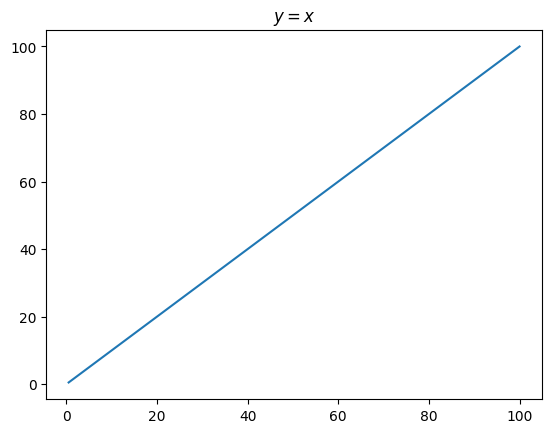

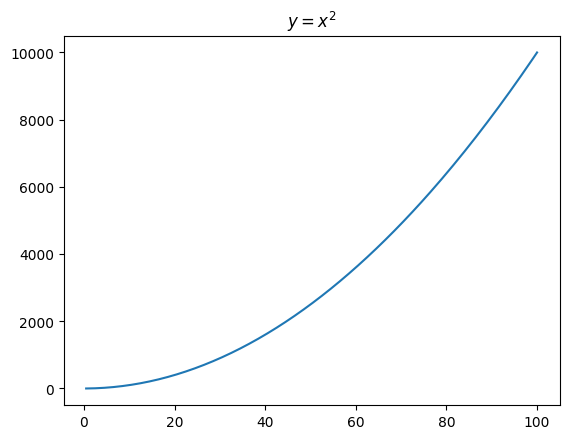

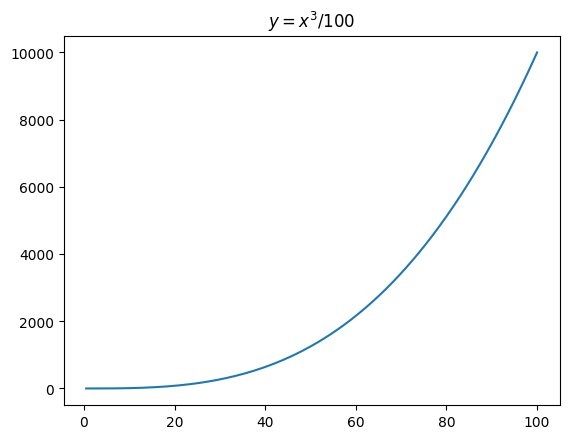

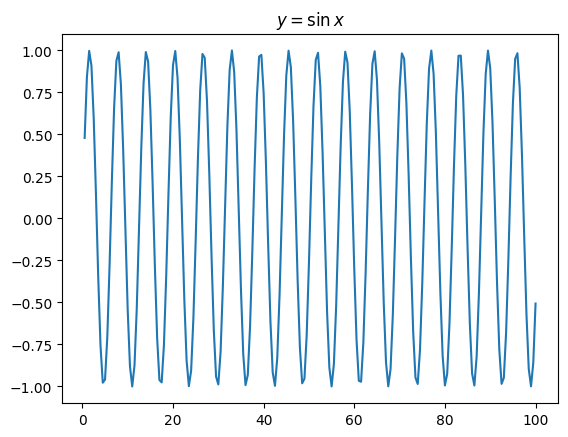

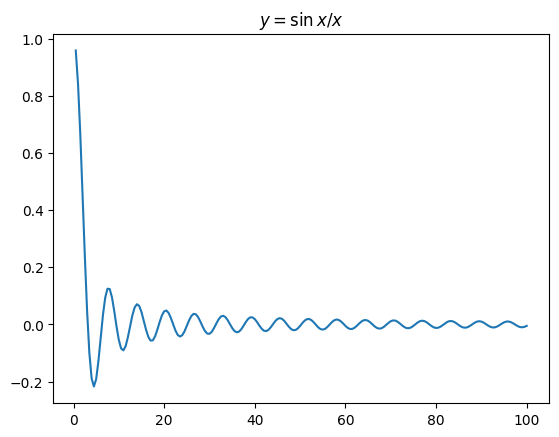

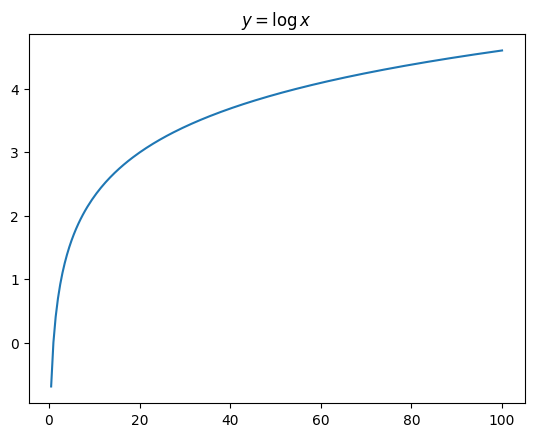

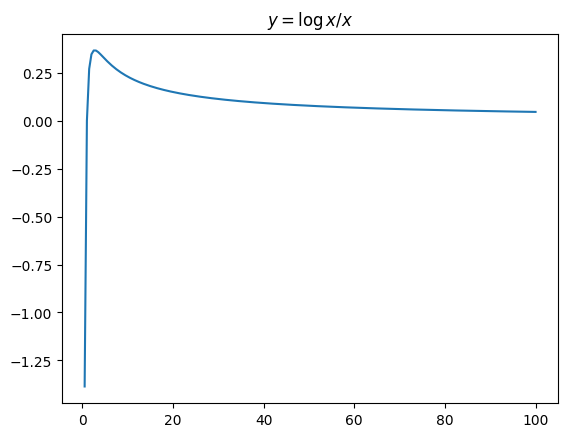

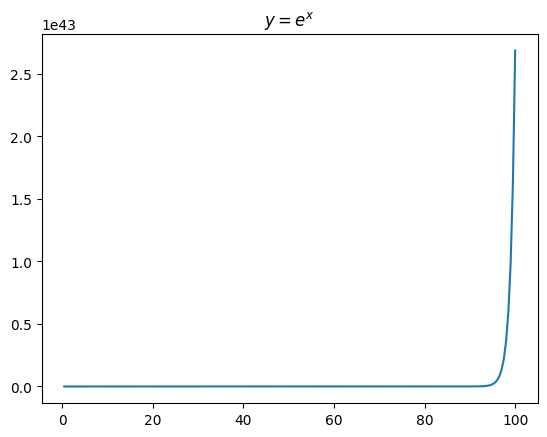

In [ ]:
from numpy import linspace, sin, log, exp
from matplotlib.pyplot import subplots

X = linspace(0.5, 100, 200)

# 1. y = x

fig, ax = subplots()
ax.plot(X, X)
ax.set_title("$y = x$")

# 2. y = x^2

fig, ax = subplots()
ax.plot(X, X**2)
ax.set_title("$y = x^2$")

# 3. y = x^3/100

fig, ax = subplots()
ax.plot(X, X**3/100)
ax.set_title("$y = x^3/100$")

# 4. y = sin(x)

fig, ax = subplots()
ax.plot(X, sin(X))
ax.set_title("$y = \sin{x}$")

# 5. y = sin(x)/x

fig, ax = subplots()
ax.plot(X, sin(X)/X)
ax.set_title("$y = \sin {x}/x$")

# 6. y = log(x)

fig, ax = subplots()
ax.plot(X, log(X))
ax.set_title("$y = \log{x}$")

# 7. y = log(x)/x

fig, ax = subplots()
ax.plot(X, log(X)/X)
ax.set_title("$y = \log{x}/x$")

# 8. y = e^x

fig, ax = subplots()
ax.plot(X, exp(X))
ax.set_title("$y = e^x$")

**Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [ ]:
import numpy as np
import pandas as pd

matrix = np.empty((20, 5))
for i in range(20):
    for j in range(5):
        matrix[i][j] = np.random.uniform(1, 2)

df = pd.DataFrame(matrix)
df.columns = ['a', 'b', 'c', 'd', 'e']

print("Column with highest standard deviation is: " ,df.std().idxmax())

print("Row with the lowest mean is: ", df.mean(axis=1).idxmin())

df.head()

Column with highest standard deviation is:  a
Row with the lowest mean is:  5


,a,b,c,d,e
0,1.890590,1.863750,1.484208,1.135377,1.215388
1,1.607869,1.266549,1.385781,1.575057,1.273743
2,1.059931,1.078402,1.842477,1.581445,1.566748
3,1.794032,1.533014,1.987149,1.805952,1.782036
4,1.099954,1.897730,1.320124,1.500220,1.440560


**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
df.insert(5, 'f', df.sum(axis=1))
df['g'] = np.where(df['f'] < 8, "LT8", "GT8")

df.head()

,a,b,c,d,e,f,g
0,1.890590,1.863750,1.484208,1.135377,1.215388,7.589315,LT8
1,1.607869,1.266549,1.385781,1.575057,1.273743,7.108998,LT8
2,1.059931,1.078402,1.842477,1.581445,1.566748,7.129003,LT8
3,1.794032,1.533014,1.987149,1.805952,1.782036,8.902183,GT8
4,1.099954,1.897730,1.320124,1.500220,1.440560,7.258589,LT8


In [ ]:
print(df['f'].std())
print(df[df['g']=="LT8"]['f'].std())
print(df[df['g']=="GT8"]['f'].std())

0.6691186611738176
0.48180794690479234
0.3494041562835272


**Q12. Write a small piece of code to explain broadcasting in numpy.**

In [ ]:
import numpy as np

# create a 2d array
array_2d = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# create a 1d array
array_1d = np.array([10, 20, 30])

# because of broadcasting, the one dimensional array is added to all rows of the 2d array
result = array_2d + array_1d

print("2D Array:\n", array_2d)
print("1D Array:\n", array_1d)
print("Result of Broadcasting:\n", result)

**Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [ ]:
import numpy as np
from random import randint

def argmin(npArray):
    dms = np.shape(npArray)
    minEl = np.ravel(npArray)[0]
    minIdx = [0 for _ in range(len(dms))]
    for indices, value in np.ndenumerate(npArray):
        if value < minEl:
            minEl = value
            minIdx = list(indices)
    return minIdx

dims = randint(3, 6)
shape = tuple(randint(4, 6) for _ in range(dims))

arr = np.random.rand(*shape)

print(argmin(arr))
print(np.unravel_index(np.argmin(arr), arr.shape))


[4, 0, 1]
(4, 0, 1)
